In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree 
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix, classification_report

Импортировали датасет в таблицу pandas

In [2]:
CRdf = pd.read_csv('data.csv')
CRdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


time - Количество секунд, прошедших между этой транзакцией и первой транзакцией в наборе данных.
v1-v28 - результат уменьшения размерности PCA для защиты удостоверений пользователей и конфиденциальных функций. 
Amount - сумма транзакции. 
Class - 1 для мошеннических транзакций, 0 для остальных

Проверка на пропуски, описание данных, статистика по каждому столбцу

In [3]:
print(f'размер датасета {CRdf.shape}')

размер датасета (284807, 31)


In [4]:
print(f'типы стобцов датасета')
print(CRdf.dtypes)

типы стобцов датасета
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
print(f'проверка на пропуски данных')
print(CRdf.isna().sum())

проверка на пропуски данных
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
print('описательная статистика данных')
print(CRdf.describe())

описательная статистика данных
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.38

In [8]:
print(f'названия столбцов {CRdf.columns}')

названия столбцов Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Данные норамлизированы, не содержат пропуски. Все атрибусы числовые признаки

Визуализация данных

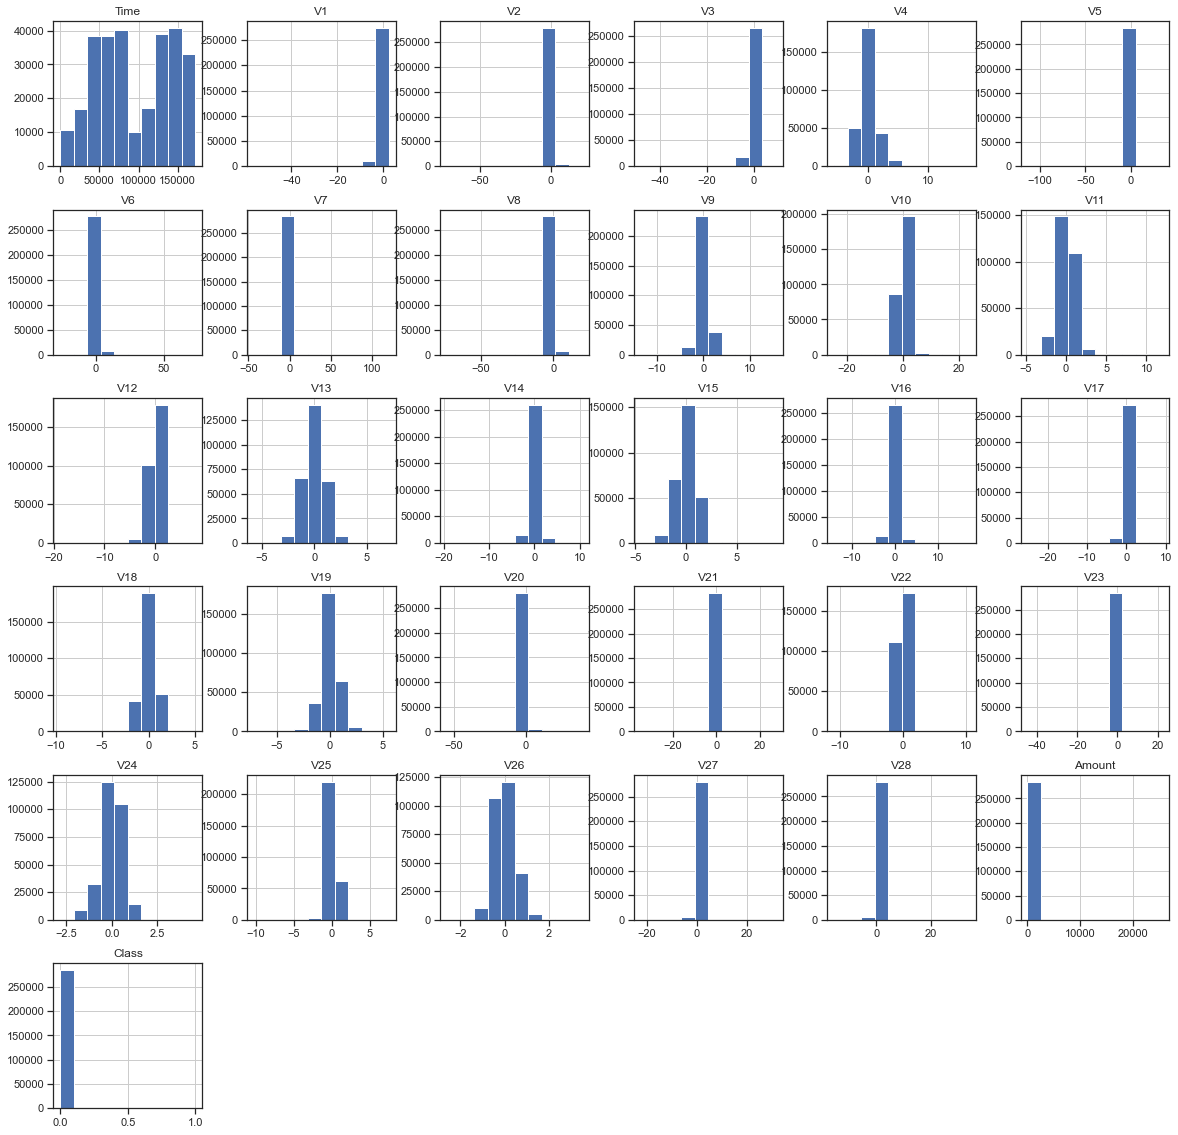

In [9]:
CRdf.hist(figsize=(20,20))
plt.show()

In [10]:
print('кол-во нормальных транзакций ', CRdf[CRdf['Class'] == 0].shape[0])
print('кол-во мошеннических транзакций ', CRdf[CRdf['Class'] == 1].shape[0])

кол-во нормальных транзакций  284315
кол-во мошеннических транзакций  492


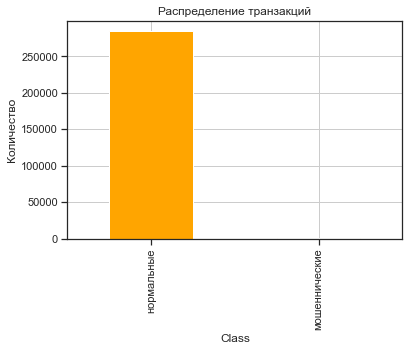

In [11]:
plt.figure()
targetEDA=CRdf.groupby('Class')['Class'].aggregate(len)
targetEDA.plot(kind='bar', grid=True, color='orange')
plt.title("Распределение транзакций")
plt.xticks(range(2), ["нормальные", "мошеннические"])
plt.ylabel("Количество");

Нормальных транзакций значительно больше

In [12]:
print('описательная статистика суммы нормальных транзакций ')
print(CRdf[CRdf['Class'] == 0].Amount.describe())
print('описательная статистика суммы мошеннических транзакций ')
print(CRdf[CRdf['Class'] == 1].Amount.describe())

описательная статистика суммы нормальных транзакций 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
описательная статистика суммы мошеннических транзакций 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


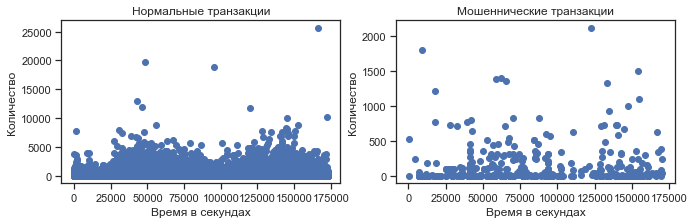

In [13]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
plt.scatter(CRdf[CRdf['Class'] == 0].Time, CRdf[CRdf['Class'] == 0].Amount)
plt.title('Нормальные транзакции')
plt.xlabel('Время в секундах'); 
plt.ylabel('Количество')
plt.subplot(1,2,2)
plt.scatter(CRdf[CRdf['Class'] == 1].Time, CRdf[CRdf['Class'] == 1].Amount)
plt.title('Мошеннические транзакции')
plt.xlabel('Время в секундах'); 
plt.ylabel('Количество')
plt.show()

Корелляция признаков

<AxesSubplot:>

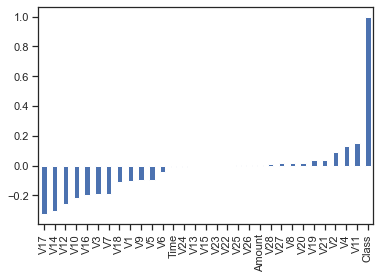

In [14]:
CRdf.corr()['Class'].sort_values().plot(kind='bar')

Атрибуты v11, v4, v2 значительно влияют на мошеннические транзакции. А атрибуты v17, v14, v12 в большей степени определяют правильные транзакции. Атрибуты "Time", "V24", "V13", "V15", "V23","V22", "V25", "V26","Amount" не на что не влияют удаляем их

In [15]:
CRdf.drop(["Time", "V24", "V13", "V15", "V23","V22", "V25", "V26","Amount"], axis=1, inplace=True)

Разделяем выборку 70 на 30

In [16]:
features_train, features_test, target_train, target_test = train_test_split(
    CRdf.iloc[:,:-1].values, CRdf['Class'].values, test_size=0.30, random_state=0)

Decision Tree Classification

In [17]:
%%time
dt_clf = tree.DecisionTreeClassifier()
dt_model = dt_clf.fit(features_train, target_train)
target_pred_dt = dt_model.predict(features_test)

Wall time: 22.2 s


Метреки эффективности

Decision Tree оценка точности 0.9992860737567735
              precision    recall  f1-score   support

  Class = no       1.00      1.00      1.00     85296
 Class = yes       0.82      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives:  85271
False Positives:  25
False Negatives:  36
True Positives:  111


<AxesSubplot:>

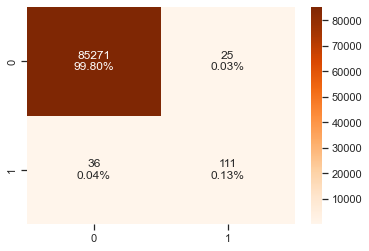

In [18]:
print("Decision Tree оценка точности", accuracy_score(target_test, target_pred_dt))
print(classification_report(target_test, target_pred_dt, target_names = ["Class = no", "Class = yes"]))
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
cm_dt = confusion_matrix(target_test, target_pred_dt)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt='', cmap='Oranges')

Построим кривую ошибок

Площадь под кривой ошибок: 0.8774044719181989 



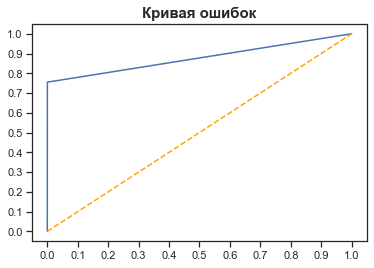

In [19]:
target_predicted = dt_model.predict_proba(features_test)[::,1]
fpr, tpr, _ = roc_curve(target_test,  target_predicted)
model_roc_auc = roc_auc_score(target_test,  target_predicted)
print("Площадь под кривой ошибок:", model_roc_auc,"\n")
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.title('Кривая ошибок', fontweight='bold', fontsize=15)
plt.show()

Random Forest Model

In [20]:
%%time
rf_clf = RandomForestClassifier(max_features='auto', random_state=123)
rf_model = rf_clf.fit(features_train, target_train)
target_pred_rf = rf_clf.predict(features_test)

Wall time: 5min 1s


Метрики эффективности

Random Forest classifier оценка точности модели 0.9995084442259752
              precision    recall  f1-score   support

  Class = no       1.00      1.00      1.00     85296
 Class = yes       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives:  85289
False Positives:  7
False Negatives:  35
True Positives:  112


<AxesSubplot:>

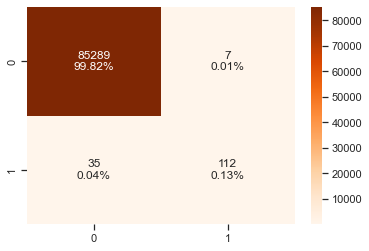

In [21]:
print("Random Forest classifier оценка точности модели", accuracy_score(target_test, target_pred_rf))
print(classification_report(target_test, target_pred_rf, target_names = ["Class = no", "Class = yes"]))
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
cm_dt = confusion_matrix(target_test, target_pred_rf)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt='', cmap='Oranges')

Построим кривую ошибок

Площадь под кривой ошибок: 0.9474302054342654 



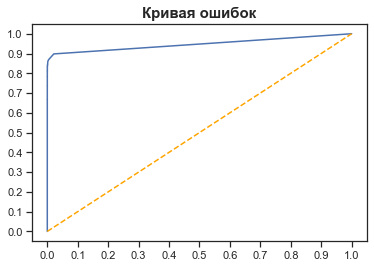

In [22]:
target_predicted = rf_model.predict_proba(features_test)[::,1]
fpr, tpr, _ = roc_curve(target_test,  target_predicted)
model_roc_auc = roc_auc_score(target_test,  target_predicted)
print("Площадь под кривой ошибок:", model_roc_auc,"\n")
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.title('Кривая ошибок', fontweight='bold', fontsize=15)
plt.show()

Extremely Randomized Trees (Extra Trees)

In [30]:
%%time
clf_xdt = ExtraTreesClassifier(n_estimators= 100, n_jobs=-1, random_state=123)
model_xdt = clf_xdt.fit(features_train, target_train)
target_predicted=clf_xdt.predict(features_test)

Wall time: 34.2 s


Метрики эффективности

Extra Trees оценка точности 0.9995084442259752
              precision    recall  f1-score   support

  Class = no       1.00      1.00      1.00     85296
 Class = yes       0.96      0.75      0.84       147

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives:  85291
False Positives:  5
False Negatives:  37
True Positives:  110


<AxesSubplot:>

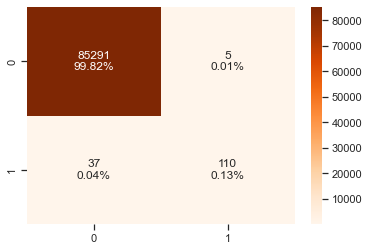

In [32]:
print("Extra Trees оценка точности", accuracy_score(target_test,target_predicted))
target_names = ["Class = no", "Class = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
cm_xdt = confusion_matrix(target_test, target_predicted)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_xdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xdt.flatten()/np.sum(cm_xdt)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_xdt, annot=labels, fmt='', cmap='Oranges')

Построим кривую ошибок

Площадь под кривой ошибок: 0.9406530057155108 



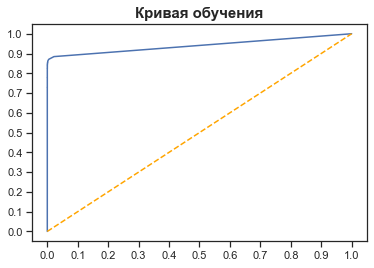

In [25]:
target_predicted = model_xdt.predict_proba(features_test)[::,1]
fpr, tpr, _ = roc_curve(target_test,  target_predicted)
model_roc_auc = roc_auc_score(target_test,  target_predicted)
print("Площадь под кривой ошибок:", model_roc_auc,"\n")
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.title('Кривая обучения', fontweight='bold', fontsize=15)
plt.show()

Logit Regression Model

In [26]:
%%time
logit = LogisticRegression()
logit_model = logit.fit(features_train, target_train)
logit_predicted=logit.predict(features_test)

Wall time: 2.93 s


Метрики эффективности

Logistic classifier оценка точности 0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives:  85285
False Positives:  11
False Negatives:  58
True Positives:  89


<AxesSubplot:>

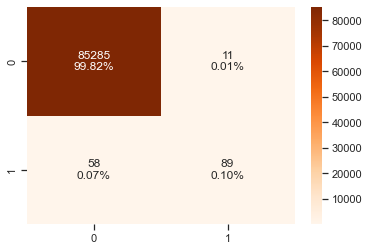

In [27]:
print("Logistic classifier оценка точности", accuracy_score(target_test, logit_predicted))
print(classification_report(target_test, logit_predicted))
tn, fp, fn, tp = confusion_matrix(target_test, logit_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
cm_logit = confusion_matrix(target_test, logit_predicted)
group_counts = ["{0:0.0f}".format(value) for value in
                cm_logit.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logit.flatten()/np.sum(cm_logit)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_logit, annot=labels, fmt='', cmap='Oranges')

Построим кривую ошибок

Площадь под кривой ошибок: 0.9677819824234328 



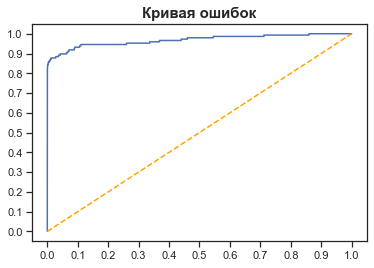

In [28]:
target_predicted = logit_model.predict_proba(features_test)[::,1]
fpr, tpr, _ = roc_curve(target_test,  target_predicted)
model_roc_auc = roc_auc_score(target_test,  target_predicted)
print("Площадь под кривой ошибок:", model_roc_auc,"\n")
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.title('Кривая ошибок', fontweight='bold', fontsize=15)
plt.show()